# **Lecture: Linear Regression**

Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit quickly and are straightforward to interpret. You are already familiar with the simplest form of linear regression model (i.e., fitting a straight line to two-dimensional data), but such models can be extended to model more complicated data behavior.

### 1. Gradient Descent in Linear Models

To better understand gradients and gradient descent, let's further explore their properties in the context of linear models.

Specifically, we will define a combination of model class, objective, and optimizer---this will give us our first supervised learning algorithm.

#### Gradient Descent Recap

A key ingredient will be gradient descent. Recall that if we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```

#### 1.1. A Supervised Learning Task: Predicting Diabetes

In this section, we are going to again use the UCI Diabetes Dataset.
* For each patient we have a access to their BMI and an estimate of diabetes risk (from 0-400).
* We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

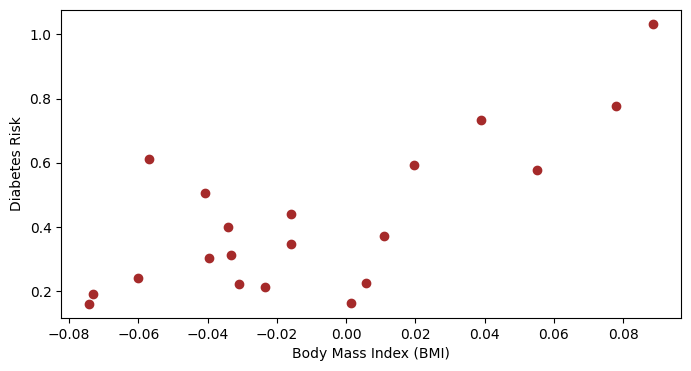

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'one']]
y_train = y.iloc[-20:] / 300


plt.scatter(X_train.loc[:,['bmi']], y_train,  color='brown')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

### 1.2. Linear Model Family

Recall that a linear model has the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x \in \mathbb{R}^d$ is a vector of features and $y$ is the target. The $\theta_j$ are the *parameters* of the model.

By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ f_\theta(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

Let's define our model in Python.

In [2]:
def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta)

### 1.3. An Objective: Mean Squared Error

We pick $\theta$ to minimize the mean squared error (MSE). Slight variants of this objective are also known as the residual sum of squares (RSS) or the sum of squared residuals (SSR).
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
In other words, we are looking for the best compromise in $\theta$ over all the data points.

Let's implement the mean squared error.

In [3]:
def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

If your data has a lot of noise, avoid MSE because it's sensitive to outliers. Use MAE instead, as it's more robust to noise.

### 1.3.1. Mean Squared Error: Derivatives and Gradients

Let's work out the derivatives for $\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2,$ the MSE of a linear model $f_\theta$ for one training example $(x^{(i)}, y^{(i)})$, which we denote $J^{(i)}(\theta)$.

\begin{align*}
\frac{\partial}{\partial \theta_j} J^{(i)}(\theta) & = \frac{\partial}{\partial \theta_j} \left(\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2\right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( f_\theta(x^{(i)}) - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( \sum_{k=0}^d \theta_k \cdot x^{(i)}_k - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j
\end{align*}

We can use this derivation to obtain an expression for the gradient of the MSE for a linear model

\begin{align*}
\small
{\tiny \nabla_\theta J^{(i)} (\theta)} = \begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\begin{bmatrix}
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_0 \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_1 \\
\vdots \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_d
\end{bmatrix}
=
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Note that the MSE over the entire dataset is $J(\theta) = \frac{1}{n}\sum_{i=1}^n J^{(i)}(\theta)$. Therefore:

\begin{align*}
\nabla_\theta J (\theta) = \begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n}\sum_{i=1}^n
\begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Let's implement this gradient.

In [4]:
def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

### 1.4. Gradient Descent for Linear Regression

Putting this together with the gradient descent algorithm, we obtain a learning method for training linear models.


```python
theta, theta_prev = random_initialization()
while abs(J(theta) - J(theta_prev)) > conv_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * (f(x, theta)-y) * x
```

This update rule is also known as the Least Mean Squares (LMS) or Widrow-Hoff learning rule.

In [5]:
threshold = 1e-3
step_size = 4e-1
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701


This procedure yields a first concrete example of a supervised learning algorithm. The final weights returned by the above algorithm yield a model, which we can visualize below.

Text(0, 0.5, 'Diabetes Risk')

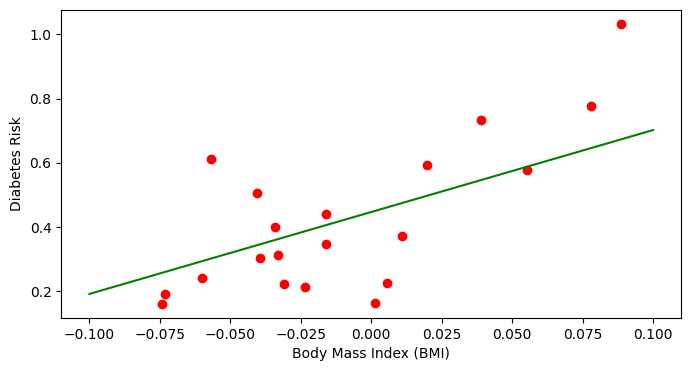

In [8]:
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='red')
plt.plot(x_line[0], y_line, color='green')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

### 1.5. 3-Dimensional Linear Regression

#### A Supervised Learning Task: Predicting Diabetes

In this section, we are going to again use the UCI Diabetes Dataset.
* For each patient we have a access to their BMI, their age and an estimate of diabetes risk (from 0-400).
* We are interested in understanding how BMI and age affects an individual's diabetes risk.

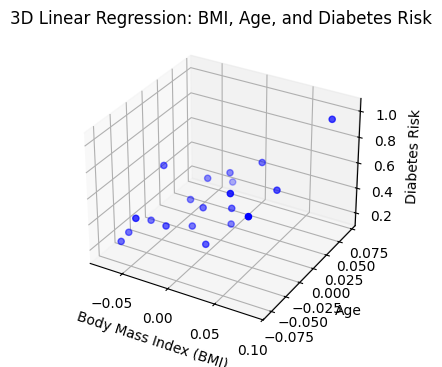

In [37]:
from mpl_toolkits.mplot3d import Axes3D

X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

X['one'] = 1

X_train = X.iloc[-20:].loc[:, ['age' ,'bmi', 'one']]
y_train = y.iloc[-20:] / 300

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

bmi = X_train['bmi']
age = X_train['age']
risk = y_train

ax.scatter(bmi, age, risk, color='blue')

ax.set_xlabel('Body Mass Index (BMI)')
ax.set_ylabel('Age')
ax.set_zlabel('Diabetes Risk')

ax.set_title('3D Linear Regression: BMI, Age, and Diabetes Risk')

plt.show()

Iteration 0. MSE: 0.048306
Iteration 100. MSE: 0.037483
Iteration 200. MSE: 0.032502
Iteration 300. MSE: 0.029389
Iteration 400. MSE: 0.027432
Iteration 500. MSE: 0.026195
Iteration 600. MSE: 0.025410
Iteration 700. MSE: 0.024909
Iteration 800. MSE: 0.024589
Iteration 900. MSE: 0.024384
Final Parameters: age    0.048338
bmi    3.507809
one    0.456067
dtype: float64


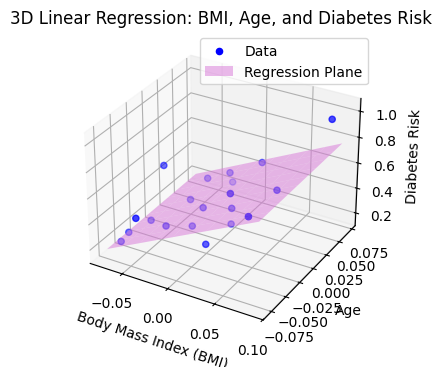

In [40]:
# Gradient Descent Parameters
threshold = 1e-3 
step_size = 7e-1
theta = np.array([2, 1, 0.5])  
theta_prev = np.ones(3)  
opt_pts = [theta]  
opt_grads = []  
iter = 0  

def mse_gradient(theta, X, y):
    """Compute the gradient of the Mean Squared Error."""
    preds = X @ theta  # Predicted values
    errors = preds - y  # Errors
    return 2 * X.T @ errors / len(y)

def mean_squared_error(theta, X, y):
    """Compute the Mean Squared Error."""
    preds = X @ theta  # Predicted values
    errors = preds - y  # Errors
    return np.mean(errors**2)

# Gradient Descent Loop
while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts.append(theta)
    opt_grads.append(gradient)
    iter += 1

print(f'Final Parameters: {theta}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train.iloc[:, 1], X_train.iloc[:, 0], y_train, color='blue', label='Data')

bmi_range = np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 10)
age_range = np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 10)
bmi_grid, age_grid = np.meshgrid(bmi_range, age_range)
risk_grid = theta[0] * age_grid + theta[1] * bmi_grid + theta[2]  # Compute predictions

ax.plot_surface(bmi_grid, age_grid, risk_grid, alpha=0.5, color='violet', label='Regression Plane')

ax.set_xlabel('Body Mass Index (BMI)')
ax.set_ylabel('Age')
ax.set_zlabel('Diabetes Risk')
ax.set_title('3D Linear Regression: BMI, Age, and Diabetes Risk')

plt.legend()
plt.show()